In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import datasets as skdata
import matplotlib.pyplot as plt
import numpy as np
import imblearn as imb
print(np.__version__)

1.20.3


In [7]:
seed = 5

从实验结果可以看出 t-SNE 算法降维后的可视化效果要远远好于 PCA 算法

D:\ProgramData\Anaconda3\envs\imba\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\ProgramData\Anaconda3\envs\imba\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


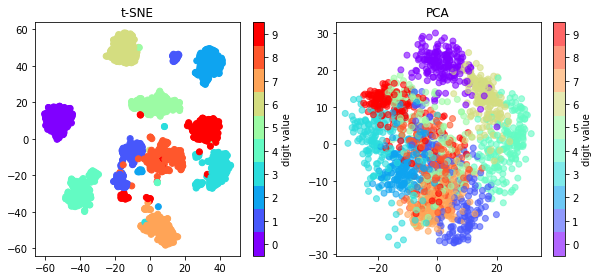

In [8]:
digits = skdata.load_digits()
X_tsne = TSNE(n_components=2, random_state=seed).fit_transform(digits.data)
X_PCA  = PCA(n_components=2).fit_transform(digits.data)

plt.figure(figsize=(8.5, 4))
plt.subplot(1, 2, 1)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target, cmap=plt.cm.get_cmap('rainbow', 10))
plt.title("t-SNE")
cbar = plt.colorbar(ticks=range(10))
cbar.set_label(label='digit value')
plt.clim(-0.5, 9.5)

plt.subplot(1, 2, 2)
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=digits.target, alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.title("PCA", )
cbar = plt.colorbar(ticks=range(10)) 
cbar.set_label(label='digit value')
plt.clim(-0.5, 9.5)
plt.tight_layout()

In [9]:
digits.data.shape
digits.target.shape

(1797,)

D:\ProgramData\Anaconda3\envs\imba\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\ProgramData\Anaconda3\envs\imba\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
D:\ProgramData\Anaconda3\envs\imba\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\ProgramData\Anaconda3\envs\imba\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


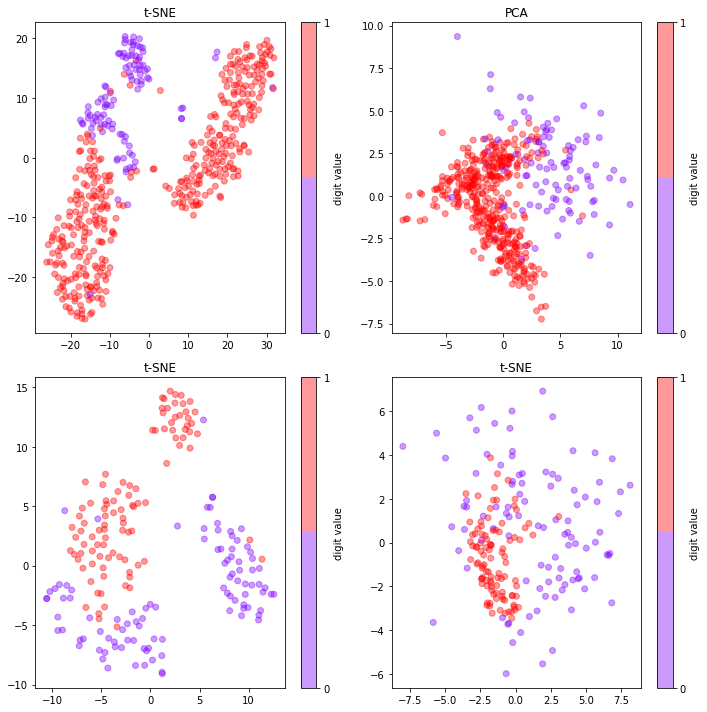

In [15]:
toy_X, toy_y  = skdata.make_classification(n_samples=500, n_features=10, n_informative=5,
                           n_redundant=2, n_repeated=1, n_classes=2, class_sep=1.5,
                           n_clusters_per_class=2, flip_y=0.01,
                           weights=[0.2, 0.8], random_state=seed)

toy_X_tsne = TSNE(n_components=2, random_state=seed).fit_transform(toy_X)
toy_X_PCA  = PCA(n_components=2).fit_transform(toy_X)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)

plt.scatter(toy_X_tsne[:, 0], toy_X_tsne[:, 1], c=toy_y, alpha=0.4, cmap=plt.cm.get_cmap('rainbow', 2))
plt.title("t-SNE")
cbar = plt.colorbar(ticks=range(2))
cbar.set_label(label='digit value')
# plt.clim(-0.5, 9.5)

plt.subplot(2, 2, 2)
plt.scatter(toy_X_PCA[:, 0], toy_X_PCA[:, 1], c=toy_y, alpha=0.4, 
            cmap=plt.cm.get_cmap('rainbow', 2))
plt.title("PCA")
cbar = plt.colorbar(ticks=range(2)) 
cbar.set_label(label='digit value')
# plt.clim(-0.5, 9.5)
# plt.tight_layout()
resampler = imb.under_sampling.NearMiss(version=2)
Resampled_X, Resampled_y = resampler.fit_resample(toy_X, toy_y)
Resampled_X_tsne = TSNE(n_components=2, random_state=seed).fit_transform(Resampled_X)
Resampled_X_PCA  = PCA(n_components=2).fit_transform(Resampled_X)

plt.subplot(2, 2, 3)
plt.scatter(Resampled_X_tsne[:, 0], Resampled_X_tsne[:, 1], c=Resampled_y, alpha=0.4, 
            cmap=plt.cm.get_cmap('rainbow', 2))
plt.title("t-SNE")
cbar = plt.colorbar(ticks=range(2)) 
cbar.set_label(label='digit value')
# plt.clim(-0.5, 9.5)

plt.subplot(2, 2, 4)
plt.scatter(Resampled_X_PCA[:, 0], Resampled_X_PCA[:, 1], c=Resampled_y, alpha=0.4, 
            cmap=plt.cm.get_cmap('rainbow', 2))
plt.title("t-SNE")
cbar = plt.colorbar(ticks=range(2)) 
cbar.set_label(label='digit value')
# plt.clim(-0.5, 9.5)

plt.tight_layout()

In [13]:
toy_y.shape



(500,)